#### Precipitation data - EDA

In [57]:
#Importing libraries to process netCDF4 data
import xarray as xr
import numpy as np
import pandas as pd
import os
#os.chdir("/Users/uditbhatia/Documents/python_tutorials/Climate tutorials")
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


#### Loading dataset and visualizing trends

In [58]:
proj_path = '/home/mohan/climate_extreme_research/consolidated_research_data/'
precipitation = xr.open_mfdataset(proj_path + 'precipitation_consolidated_1X1.nc')

In [59]:
precipitation_df = precipitation.to_dataframe().reset_index()

: 

In [ ]:
precipitation_new = precipitation.fillna(0)

In [ ]:
print("Number of rows in the dataframe")
total_rows = precipitation_df.shape[0]
print(total_rows)

Number of rows in the dataframe
48936195


In [ ]:
print("Values with nan")
na_values = sum(np.isnan(precipitation_df['RAINFALL']))
print(na_values)


Values with nan
33810462


In [ ]:
print('Percentage of null values')
perc_null = na_values/total_rows
print(perc_null*100)

Percentage of null values
69.0909090909091


In [46]:
precipitation_df['RAINFALL'].nunique()

3359536

In [47]:
sum(np.isnan(precipitation_df['RAINFALL']))

33810462

In [48]:
48936195-33810462


15125733

In [38]:
#Checking number of rows with missing values - nan
precipitation_df['Null_Value_Count'] =np.where(precipitation_df['RAINFALL'].isnull,1,0)

AttributeError: 'Series' object has no attribute 'isnan'

In [31]:
sum(precipitation_df['Null_Value_Count']) 

48936195

In [9]:
precipitation_new = precipitation.where(precipitation.TIME.isin('2020-01-01'),drop= True)

In [16]:
precipitation.TIME.values

array(['1901-01-01T00:00:00.000000000', '1901-01-02T00:00:00.000000000',
       '1901-01-03T00:00:00.000000000', ...,
       '2016-12-29T00:00:00.000000000', '2016-12-30T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

<xarray.Dataset>
Dimensions:    (LATITUDE: 33, LONGITUDE: 35)
Coordinates:
    TIME       datetime64[ns] 2014-12-31
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5
Data variables:
    RAINFALL   (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(33, 35), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


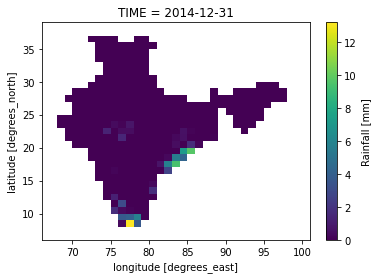

In [23]:

prec = precipitation.sel(TIME = '2014-12-31T00:00:00.000000000')
print(prec)
prec['RAINFALL'].plot()
plt.show()

In [24]:
prec['RAINFALL'].values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

There are a lot of missing values (nan) values in the dataset

In [4]:
#Filtering data for a single lat-long combination for initial analysis

precipitation_df = precipitation.to_dataframe().reset_index()


In [5]:
precipitation_df.head()

,TIME,LATITUDE,LONGITUDE,RAINFALL
0,1901-01-01,6.5,66.5,NaN
1,1901-01-01,6.5,67.5,NaN
2,1901-01-01,6.5,68.5,NaN
3,1901-01-01,6.5,69.5,NaN
4,1901-01-01,6.5,70.5,NaN


In [6]:
precipitation_df['LONGITUDE'].unique()

array([ 66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,  74.5,
        75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,  83.5,
        84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,  91.5,  92.5,
        93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5, 100.5])

In [7]:
precipitation_df['LATITUDE'].unique()

array([ 6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5,
       17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5,
       28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5])

In [14]:
prec_one_point_df = precipitation_df[(precipitation_df['LONGITUDE']==73.5) & (precipitation_df['LATITUDE']==24.5)] 


Text(0, 0.5, 'Frequency')

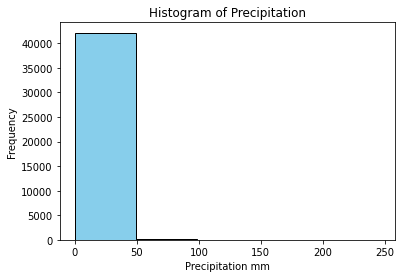

In [18]:
prec_one_point_df['RAINFALL'].plot(kind = 'hist',bins = 5, edgecolor= 'black',color = 'skyblue')
plt.title("Histogram of Precipitation")
plt.xlabel("Precipitation mm")
plt.ylabel('Frequency')

Text(0, 0.5, 'Precipitation - mm')

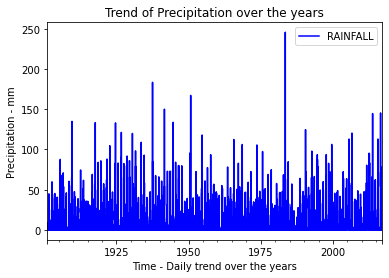

In [25]:
#Plotting trendline over the years
prec_one_point_df.plot(x = 'TIME',y = 'RAINFALL',linestyle ='-',color = 'blue')
plt.title("Trend of Precipitation over the years")
plt.xlabel('Time - Daily trend over the years')
plt.ylabel('Precipitation - mm')


In [22]:
prec_one_point_df.head()

,TIME,LATITUDE,LONGITUDE,RAINFALL
637,1901-01-01,24.5,73.5,0.0
1792,1901-01-02,24.5,73.5,0.0
2947,1901-01-03,24.5,73.5,0.0
4102,1901-01-04,24.5,73.5,0.0
5257,1901-01-05,24.5,73.5,0.0


#### Plotting average precipitation over the years

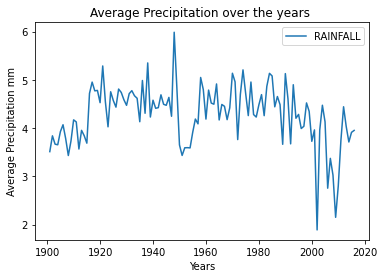

In [25]:
mean_prec = precipitation.mean(dim='LATITUDE')
mean_prec = mean_prec.mean(dim = 'LONGITUDE')
#print(mean_prec)
annual_mean  = mean_prec.groupby('TIME.year').mean('TIME')
#print(annual_mean)
df = annual_mean.to_dataframe()
df.plot(title = 'Average Precipitation over the years ')
plt.xlabel("Years")
plt.ylabel('Average Precipitation mm')
plt.show()

#### Sample plot for precipitation data

In [26]:

prec = precipitation.sel(TIME = '2022-12-31')
print(prec)
prec['RAINFALL'].plot()
plt.show()

KeyError: "not all values found in index 'TIME'. Try setting the `method` keyword argument (example: method='nearest')."

: 